# **Homework 3**
John Baierl \
STATS M231A


*Problem 1:*



(1): *Derive the learned $f(x_0)$ in kernel regression.*

In the regression case, we are interested in predicting a the outcome $y_0$ for a new observation, $y_0 = f(x_0)$.  Our goal is to learn the specific function $f$ within some specified class to minimize a loss function.  Kernel regression makes use of the representer form in which we express this solution as a linear combination of kernel products for some kernel function $K$.

More rigorously, under least-squares loss, we wish to minimize:

$
Loss(f) = \sum_{i = 1}^{n} (y_i - f(x_i))^2 + \lambda |f|^2_{\mathcal{F}}
$

where $ |f|^2_{\mathcal{F}}$ is some measure of smoothness (e.g. $|\beta|_{\ell_2}^2$ in the case of ridge regression).  Our representer will then be in the form:

$
\hat{f}(x_0) = \sum_{i = 1}^{n} c_i K(x_i, x_0)
$

This emerges from our understanding of $\hat{f}$ being a projection of $f$ onto the space of the kernel $K$.

We can apply this to the case of ridge regression, expressing our loss function as:

$
Loss(\beta) = \sum_{i = 1}^{n} (y_i - h(x_i)^T \beta)^2 + \lambda |\beta|_{\ell_2}^2
$

where $h(x)$ is a possibly infinite-dimensional feature vector.  Our parameter estimate can then be expressed in representer form as $\hat{\beta} = \sum_{i = 1}^{n} c_i h(x_i)$.  Our loss function becomes:

$
\begin{align}
Loss(\beta) &= \sum_{i = 1}^{n} \left( y_i - h(x_i)^T \sum_{i = 1}^{n} c_i h(x_i) \right)^2 + \lambda \langle \sum_{i = 1}^{n} c_i h(x_i), \sum_{j = 1}^{n} c_j h(x_j) \rangle \\
&= \sum_{i = 1}^{n} \left( y_i - \sum_{j = 1}^{n} c_j K_{ij} \right)^2 + \lambda \sum_{i = 1}^{n} c_i c_j K_{ij}
\end{align}
$

where $K_{ij} = K(x_i, x_j)$.  Minimizing this loss function to solve for $c$:

$
\begin{align}
Loss(c) &= |Y - Kc|^2 + \lambda c^T K c \\
&= (Y - Kc)^T (Y - Kc) + \lambda c^T K c \\
&= Y^T Y - c^T KY - YKc + c^T K^2 c + \lambda c^T K c \\
\frac{\partial Loss}{\partial c} &= -2 KY + 2 K^2 C + 2 \lambda Kc \\
0 &= \\
(K + \lambda I_n)c &= Y \\
c &= (K + \lambda I_n)^{-1} Y
\end{align}
$

Note that while the feature vector $h(x)$ is implicit, the kernel function is explicitly specified, capturing those higher-dimensional relationships.  This allows us to save computational cost by simply computing the kernel at observed and test points, then scaling by the learned $c$ and summing.

(2): *Derive the posterior distribution of $f(x_0)$ in Gaussian process.*

In Gaussian process case, we assign a function $f$ a prior distribution given by:

$f ∼ GP(0, \tau^2 K)$

We can think of this a describing the ditribution of a population of equally likely curves, $f$, that fit our observed data, $(X, Y)$.  The kernel function $K$ defines the covariance between continuous observations at $x_i$ and $x_j$.  This leads to the interpretation of the kernel function in Gaussian process as an infinite-dimensional covariance matrix.

Moreover, since the marginal and conditional distributions of any multivariate Gaussian distribution is also Gaussian, we can use block matrices and the well-known properties of bivariate Gaussian distributions to derive the posterior distribution $f(x_0)$ at some new observation $x_0$.

We begin by expressing the joint distribution of the observed $y_i = f(x_i), i = 1, \dots, n$ and new prediction, $y_0 = f(x_0)$ as jointly Gaussian, given by:

$
\begin{pmatrix}
f(x_1) \\
\vdots \\
f(x_i) \\
\vdots \\
f(x_n) \\
f(x_0)
\end{pmatrix}
\sim N
\begin{pmatrix}
\vec{0}, &
\begin{bmatrix}
\tau^2 K_{1, 1} & \dots & \tau^2 K_{1, i} & \dots & \tau^2 K_{1, n} & \tau^2 K_{1, 0} \\
\vdots & \ddots & \vdots & & \vdots & \vdots \\
\tau^2 K_{i, 1} & \dots & \tau^2 K_{i, i} & \dots & \tau^2 K_{i, n} & \tau^2 K_{i, 0} \\
\vdots & & \vdots & \ddots & \vdots & \vdots \\
\tau^2 K_{n, 1} & \dots & \tau^2 K_{n, i} & \dots & \tau^2 K_{n, n} & \tau^2 K_{n, 0} \\
\tau^2 K_{0, 1} & \dots & \tau^2 K_{0, i} & \dots & \tau^2 K_{0, n} & \tau^2 K_{0, 0}
\end{bmatrix}
\end{pmatrix}
$

where $K_{i, j} = K(x_i, x_j)$.  To simplify, define the following matrices:

$
A = \begin{bmatrix}
\tau^2 K_{1, 1} & \dots & \tau^2 K_{1, i} & \dots & \tau^2 K_{1, n} \\
\vdots & \ddots & \vdots & & \vdots \\
\tau^2 K_{i, 1} & \dots & \tau^2 K_{i, i} & \dots & \tau^2 K_{i, n} \\
\vdots & & \vdots & \ddots & \vdots \\
\tau^2 K_{n, 1} & \dots & \tau^2 K_{n, i} & \dots & \tau^2 K_{n, n}
\end{bmatrix},
B = \begin{bmatrix}
\tau^2 K_{1, 0} \\
\vdots \\
\tau^2 K_{i, 0} \\
\vdots \\
\tau^2 K_{n, 0}
\end{bmatrix},
C = \begin{bmatrix}
\tau^2 K_{0, 0}
\end{bmatrix}
$

We can then express this joint distribution as bivariate Gaussian over block matrices, adding i.i.d. noise $\sigma^2$ to the observed $X$:

$
\begin{pmatrix}
Y \\
y_0
\end{pmatrix}
\sim N
\begin{pmatrix}
\vec{0}, & \begin{bmatrix}
A + \sigma^2 I_n & B \\
B^T & C
\end{bmatrix}
\end{pmatrix}
$

From the conditional distribution of a bivariate Gaussian distribution, we find:

$
\left[ \hat{y} = f(x_0) | Y, X \right] \sim N \left( B^T (A + \sigma^2 I_n)^{-1} Y, C - B^T (A + \sigma^2 I_n)^{-1} C \right)
$

(3): *Compare (1) and (2), and interpret them as interpolative memorization.*

Both kernel regression and Gaussian process employ the representer theorem, expressing the loss-minimizing function as a learned linear combination of implicit features of the observed data.  As such, both methods employ the kernel trick in their computation.  The posterior mean of $\hat{y}$ given by $E[\hat{y}] = B^T (A + \sigma^2 I_n)^{-1}Y$ serves as a useful point of comparison between the two learning methods.  Similar to the kernel regression result in the ridge case, the MAP estimate involves the linear combination $(A + \sigma^2 I_n)^{-1}Y$.  However, in the Gaussian distribution case, we further rescale by the query point's high-dimensional relationship with each of the training examples by left multiplying by $B^T$.  In this sense, the algorithm is "memorizing" the observed training examples, then using the relationships embedded in the kernel function to interpolate between them as well.

(4): *Write Python code for Gaussian process in 1D case. Plot posterior mean ± standard*

The code below generates simulated data for an arbitrary polynomial function with Gaussian noise.

Text(0.5, 1.0, '20 Observations')

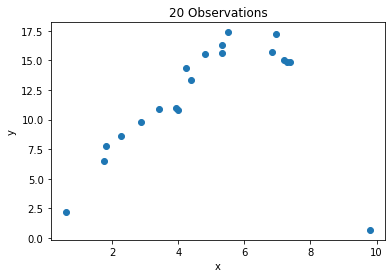

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#Generate some test data...
n = 20

np.random.seed(123)
x = np.random.uniform(low = 0, high = 10, size = n)
eps = np.random.normal(loc = 0, scale = 1, size = n)
y = -0.1 * x**3 + x**2 - 0.5 * x + 5 + eps #Arbitrary function w/ Gaussian noise

plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("20 Observations")

We now fit a Gaussian process regression model using a radial basis function kernel:

In [3]:
#To simplify, limited to 1D case for now:

def gauss_kernel(x, x_prime, gamma = 1):
  return(np.exp(-gamma * (x - x_prime)**2))

def my_GP(x, y, x_prime, conf = 0.95,
          gamma = 1, tau2 = 1, sig2 = 1):
  n_obs = x.shape[0]; n_test = x_prime.shape[0]
  #Initialize block matrices
  A = np.empty(shape = (n_obs, n_obs))
  B = np.empty(shape = (n_obs, n_test))

  for i in np.arange(n_obs):
    for j in np.arange(n_obs):
      A[i, j] = tau2 * gauss_kernel(x[i], x[j], gamma)
    for j in np.arange(n_test):
      B[i, j] = tau2 * gauss_kernel(x[i], x_prime[j], gamma)
  A += sig2 * np.identity(n_obs)
  Ainv = np.linalg.inv(A)
  C = tau2 * np.ones(n_test)

  mean = np.matmul(B.T, np.matmul(Ainv, y))
  var = C - np.sum(B.T * np.matmul(Ainv, B).T, axis = 1)
  conf_int = np.empty(shape = (n_test, 2))
  z_star = -norm.ppf((1 - conf) / 2)

  conf_int[:, 0] = -z_star * np.sqrt(var) + mean
  conf_int[:, 1] = z_star * np.sqrt(var) + mean
  return(mean, var, conf_int)


Next, we form a dense grid of $x$'s and plot the predicted means and 95% confidence bounds based on the training data and ground truth function above:

Text(0.5, 1.0, 'Gaussian Process Regression Fit (95%-CI)')

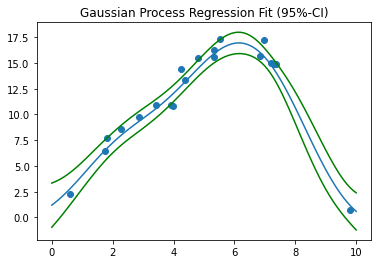

In [6]:
x_grid = np.linspace(0, 10, 101)
model = my_GP(x, y, x_grid, conf = 0.95, 
              sig2 = 1, gamma = 0.2, tau2 = 4)

plt.plot(x_grid, model[0])
plt.scatter(x, y)
plt.plot(x_grid, model[2], color = "green")
plt.title("Gaussian Process Regression Fit (with 95%-CI)")

The model successfully interpolates the missing regions in our training data while giving associated uncertainty estimates that match with our intuition.  Our next step would be to optimize the hyperparameters by maximizing the log-likelihood function.  However, this is outside the bounds of this HW!

*Problem 2:*



(1): *Derive kernel SVM for the non-separable case, especially the dual optimization problem.*

The objective of SVM for classification is to learn a separating hyperplane to separate training examples.  The "best" hyperplane is obtained by finding the maximum margin classifier.  We determine this by projecting our training examples onto a unit vector $\vec{u}$ orthogonal to the separating hyperplane.  We can assess a classifier by the margin $\Delta$, the distance from the projected traning examples closest to the separating hyperplane.

Translating this into an optimization problem, we can define:

$
a_+ = \min_{i: y_i = 1} \langle x_i, \vec{u} \rangle
a_- = \min_{i: y_i = -1} \langle x_i, \vec{u} \rangle
$

Then $\bar{a} = \frac{a_+ + a_-}{2}$, and $\Delta = a_+ - \bar{a} = a_- - \bar{a}$.  We can combine this as:

$
\begin{cases}
\langle x_i, \vec{u} \rangle - \bar{a} \ge \Delta & y_i = + \\
\langle x_i, \vec{u} \rangle - \bar{a} \le \Delta & y_i = -
\end{cases}
$

Defining $w = \frac{\vec{u}}{\Delta}$ and $b = \frac{\bar{a}}{\Delta}$, this becomes:

$
\begin{cases}
\langle x_i, w \rangle - b \ge 1 & y_i = + \\
\langle x_i, w \rangle - b \le -1 & y_i = -
\end{cases}
$

Coding responses as $y_i \in \{-1, 1 \}$ allows us to combine these equations into:

$
y_i \left( \langle w, x_i \rangle + b \right) \ge 1
$

Given that $\Delta = \frac{1}{|w|}$, our optimization problem is to learn $(w, b)$:

$
\min_{(w, b)} \frac{1}{2}|w|^2
$

subject to
$
y_i \left( \langle x_i, w \rangle + b \right) \ge 1
$
for $i = 1, \dots, n$.

In the case of non-separable data, we add some slackness $\xi_i$ measuring the distance of misclassified observations beyond the separating hyperplane.  Our new optimization problem becomes:

$
\min_{(w, b), \xi} \frac{1}{2}|w|^2 + c \sum_{i = 1}^{n} \xi_i
$

subject to
$
y_i \left( \langle x_i, w \rangle + b \right) \ge 1 - \xi_i
$
for $i = 1, \dots, n$.

We can consider this our primal problem for optimization.

We next translate this into a dual problem to solve computationally. Forming the Lagrangian function:

\begin{align}
\mathcal{L} \left( (w, b, \xi), (\alpha, \mu) \right) &= \frac{1}{2} |w|^2 + c \sum_{i = 1}^{n} \xi_i + \sum_{i = 1}^{n} \alpha_i \left( 1 - \xi_i - y_i (\langle x_i, w \rangle + b) \right) + \sum_{i = 1}^{n} \mu_i (-\xi_i) \\
&= \frac{1}{2} |w|^2 + \sum_{i = 1}^{n} \alpha_i \left( 1 - y_i(\langle x_i, w, \rangle + b) \right) + \sum_{i = 1}^{n} \xi_i (c - \alpha_i - \mu_i)
\end{align}

for $\alpha \ge 0$, $\mu \ge 0$. This becomes our dual problem for optimization.  Note that this Lagrangian function is convex in our primal variables $(w, b, \xi)$, but concave in our dual variables $(\alpha, \mu)$.  So our dual problem becomes:

$
\max_{(\alpha, \mu) \ge 0} \min_{(w, b, \xi)} \mathcal{L} \left( (w, b, \xi), (\alpha, \mu) \right)
$

This emerges from Von Neumann's Therom stating that the minimax and maximin problems are equivalent for a concave-convex function $\mathcal{L}$.

Differentiating this objective function with respect to $\xi_i$ yields:

$
\begin{align}
\frac{\partial \mathcal{L}}{\partial \xi_i} &= c - \alpha_i - \mu_i \\
0 &= \\
\alpha_i &= c - \mu_i \\
\alpha_i &\le c
\end{align}
$

So we can frame this dual problem (with slackness) as putting an additional constrant on alpha.  So our problem becomes:

$
\max_{\alpha_i \in [0, c] \forall i} Q(\alpha)
$

where:

$
\begin{align}
Q(\alpha) &= \min_{(w, b)} \frac{1}{2} |w|^2 + \sum_{i = 1}^{n} \alpha_i \left( 1 - y_i(\langle x_i, w, \rangle + b) \right) \\
&= \sum_{i = 1}^{n} \alpha_i - \frac{1}{2}|\sum_{i = 1}^{n} \alpha_i y_i x_i| \\
&= \sum_{i = 1}^{n} \alpha_i - \sum_{i = 1}^{n} \alpha_i \alpha_j y_i y_j \langle x_i x_j \rangle
\end{align}
$

We can then use constrained coordinate ascent to compute to maximize $Q(\alpha)$ over $\alpha_k \in [0, c]$ while fixing $\alpha_i, i\ne k$.  Differentiating $Q(\alpha_k)$ with respect to $\alpha_k$ and setting equal to 0 yields:

$
\begin{align}
0 &= -Q_{kk} \alpha_k + 1 - \sum_{i \ne k} \alpha_i Q_{ik} \\
\alpha_k^* &= \frac{1 - \sum_{i \ne k} \alpha_k Q_{ik}}{Q_{kk}}
\end{align}
$

where $Q_{ij} = y_i y_j \langle x_i, x_j \rangle$.

(2): Code is below:

In [7]:
def gauss_kernel(x, x_prime, gamma = 1):
  return(np.exp(-gamma * np.dot(x - x_prime, x - x_prime)))

def update_alpha(alpha, x, y, eps = 1e-6, maxiter = 1e3):
  n = x.shape[0]
  delta_alpha = 100 #arbitrary initialization
  niter = 0
  while (delta_alpha > eps and niter < maxiter):
    prev_alpha = np.copy(alpha)
    for k in np.arange(n):
      Q_kk = y[k]**2 * gauss_kernel(x[k], x[k])
      num = 1
      for i in np.delete(np.arange(n), k):
        num += -(alpha[i] * y[i] * y[k] * gauss_kernel(x[i], x[k]))
      alpha_star = num / Q_kk
      if alpha_star >= 0:
        alpha[k] = alpha_star
      else:
        alpha[k] = 0
    delta_alpha = np.dot(alpha - prev_alpha, alpha - prev_alpha)
    niter += 1
  return(alpha, niter)

def my_SVM(x_train, y_train, x_test, b = 0, gamma = 1, maxiter = 1e3):
  n_obs = x_train.shape[0]
  n_test = x_test.shape[0]
  p = x_train.shape[1]
  if p != x_train.shape[1]:
    print("Error: Dimension mismatch between training and testing data.")
    return
  #Train SVM model:
  alpha_init = np.ones(n_obs)
  alpha_hat, n_iter = update_alpha(alpha_init, x_train, y_train, maxiter = maxiter)

  pred = np.empty(n_test)
  for i in np.arange(n_test):
    tot = 0
    for j in np.arange(n_obs):
      tot += alpha_hat[j] * y_train[j] * gauss_kernel(x_train[j], x_test[i])
    pred[i] = tot
    pred = (pred > 0) * 2 - 1
  return(pred, alpha_hat, n_iter)

In [8]:
#Same simulated data from HW2:
n = 100
p = 2
np.random.seed(42)
x1 = np.random.uniform(low = 0, high = 1, size = n)
x2 = np.random.uniform(low = 0, high = 1, size = n)
X = np.c_[x1, x2]
Y = (np.square(x1) + np.square(x2) <= np.ones(n)) * 2 - 1 #Y needs to be coded as -1/+1

#Form dense grid of x's:
grid_1 = np.repeat(np.linspace(0, 1, 51), 51)
grid_2 = np.tile(np.linspace(0, 1, 51), 51)
grid = np.c_[grid_1, grid_2]

#Fit model:
svm_fit = my_SVM(X, Y, grid, maxiter = 1000)

Text(0.5, 1.0, 'SVM Predictions Over Dense Grid')

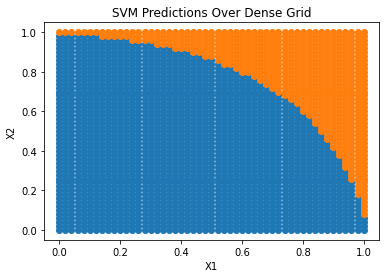

In [9]:
pred = svm_fit[0]

plt.scatter(grid[pred == 1][:, 0], grid[pred == 1][:, 1])
plt.scatter(grid[pred == -1][:, 0], grid[pred == -1][:, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("SVM Predictions Over Dense Grid")

We can see in the figure above that the SVM learns the unit circle boundary extremely well.  Comparison to the XGBoost performance in HW2 is difficult due to the simplicity of the decision boundary; both algorithms learn the boundary almost perfectly after relatively few iterations.